In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta
import os
import datetime
import json
import seaborn as sns
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbt as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from monday import get_data,Strategy
sns.set_style("darkgrid")

/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/monday/../../vectorbtpro/accessors.py:188: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_SRAccessor'> under name 'vbt' for type <class 'pandas.core.series.Series'> is overriding a preexisting attribute with the same name.
  class Vbt_SRAccessor(DirNamesMixin, GenericSRAccessor):
/Users/johnsonhsiao/DC_capital_intern/strategy_research/CTA_TEST/Crypto/monday/../../vectorbtpro/accessors.py:208: UserWarning: registration of accessor <class 'vectorbtpro.accessors.Vbt_DFAccessor'> under name 'vbt' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class Vbt_DFAccessor(DirNamesMixin, GenericDFAccessor):


In [2]:
df_dict = {}
candidate = ['BTC']
    # 'LTC','BTC','XRP','BCH'
    #         ,'BNB','SOL','MATIC',
    #         'XRP','DYDX','AVAX','LINK','GAS',
    #         'DOGE','ORDI','TRB','WLD','ADA',
    #         'OP','FIL','ZRX','LTC','RUNE','ATOM',
    #         'ARB','GMT','ETC','ARK','BCH','DOT',
    #         'LDO','SUI','GALA','CAKE',
    #         'APE','INJ','FTM','APT','YFI','OMG',
    #         'SEI','EOS','1000SHIB','NEAR',                                                                                                                                            
    #         'MKR','CYBER','UNI',
    #         'BLUR','SUSHI','WAVES','MASK','MANA',
    #         'EGLD','AAVE','NEO','FET','TRX','GRT','ALGO','STX','XLM']
for coin in candidate:
    df_dict[coin] = get_data(coin)

APY: 93.55 %
MDD: 33.61 %
MDD Duration 147 days 03:00:00
worst trade: -15.33 %
2023-06-18 00:00:00 ~ 2023-06-24 00:00:00
avg holding days: 4.37 days
--------------------------------------------
PF: 1.85
Sharpe Ratio: 1.59
Calmar Ratio: 2.09
Sortino Ratio: 2.34
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 1.29 %
Total Time Exposure : 84.93 %
Total Trades: 138
Win Rate: 48.18 %
--------------------------------------------
PF * Win Rate: 0.893


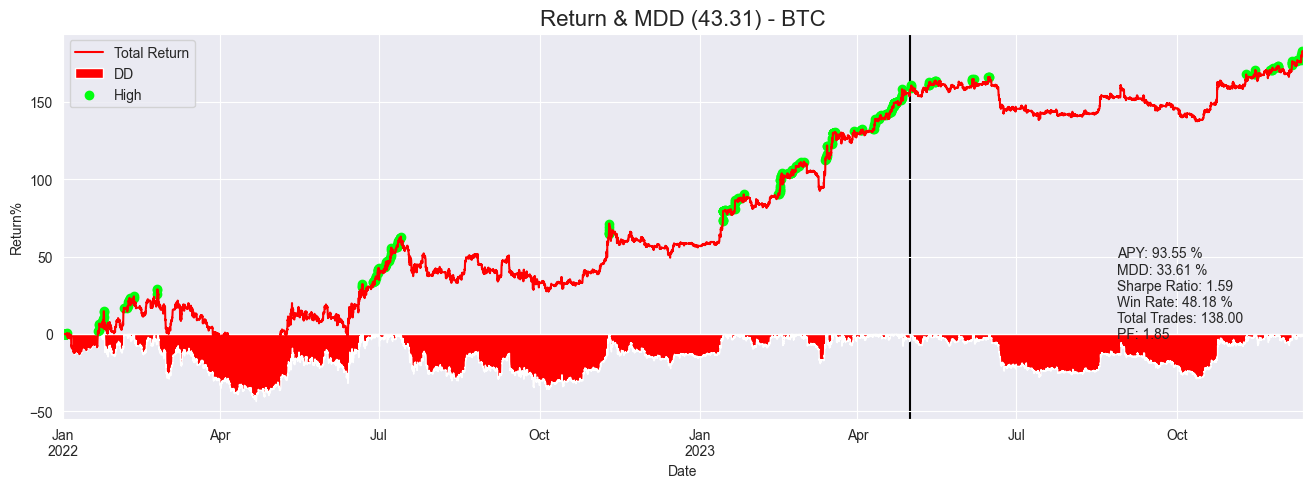

In [26]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
params = {'vol_threshold': 10, 'ret_threshold': 1}
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'BTC'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
value = analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

In [4]:
start= '2022-01-01'
end ='2023-05-01'

params={
   'vol_threshold': [5, 50, 5],
   'ret_threshold' : [1, 20, 1],
    }
    
config = {'freq':'1h','fee': 0.0003}
symbol_list = ['BTC']#,'ETH','LTC','XRP','BCH','AAVE']
sample_sets = [[start,end]]

multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    df_dict=df_dict,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

# multi_test.run(optimize=True,rolling=False,side_list=['L/S','both'],sep='2023-03-01')

======================= BTC L/S Optimize Test =======================

---------- BTC Long ----------
Optimization trails: 171


100%|██████████| 171/171 [04:37<00:00,  1.62s/it]


Optimization time: 277.77 sec
{'vol_threshold': 5, 'ret_threshold': 1}
APY: 25.43 %
MDD: 58.01 %
MDD Duration 403 days 23:00:00
worst trade: -27.90 %
2022-06-12 00:00:00 ~ 2022-06-18 00:00:00
avg holding days: 5.70 days
--------------------------------------------
PF: 1.32
Sharpe Ratio: 0.70
Calmar Ratio: 0.42
Sortino Ratio: 0.99
Omega Ratio: 1.03
--------------------------------------------
Expectancy : 0.73 %
Total Time Exposure : 53.91 %
Total Trades: 46
Win Rate: 50.00 %
--------------------------------------------
PF * Win Rate: 0.658


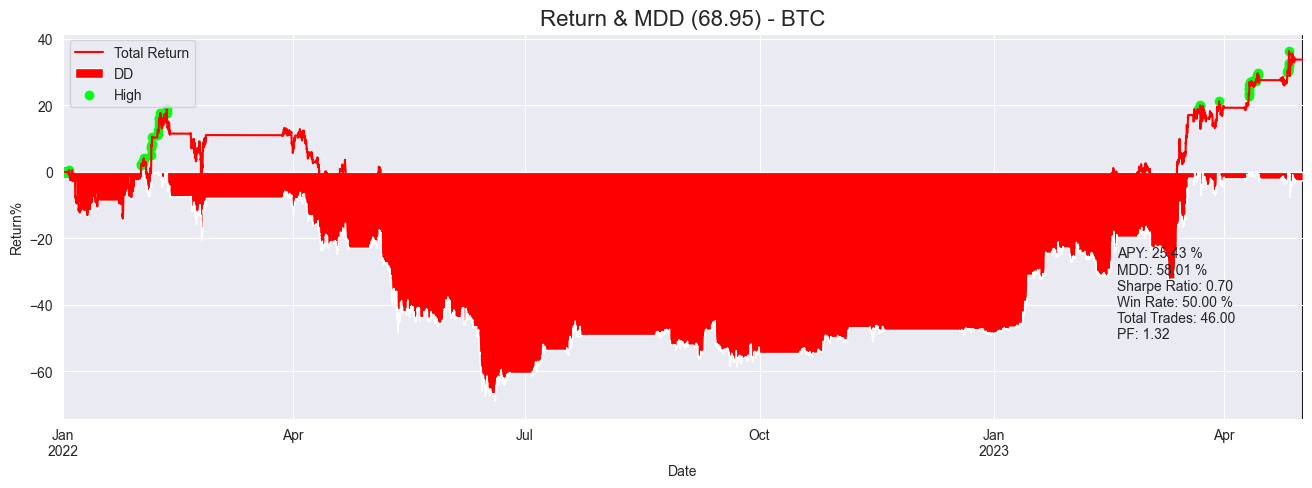


---------- BTC Short ----------
Optimization trails: 171


100%|██████████| 171/171 [04:32<00:00,  1.59s/it]


Optimization time: 272.26 sec
{'vol_threshold': 45, 'ret_threshold': 6}
APY: 50.07 %
MDD: 24.82 %
MDD Duration 173 days 02:00:00
worst trade: -9.74 %
2022-01-30 00:00:00 ~ 2022-02-05 00:00:00
avg holding days: 5.71 days
--------------------------------------------
PF: 2.18
Sharpe Ratio: 1.30
Calmar Ratio: 1.88
Sortino Ratio: 1.92
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 2.38 %
Total Time Exposure : 32.92 %
Total Trades: 28
Win Rate: 53.57 %
--------------------------------------------
PF * Win Rate: 1.166


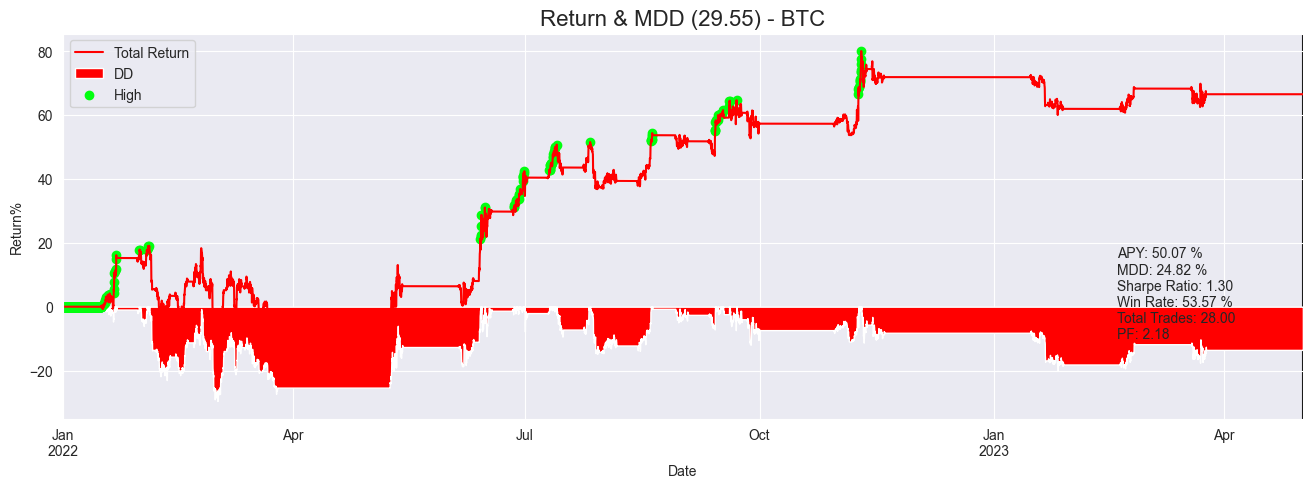

-------- BTC L/S --------
APY: 75.49 %
MDD: 47.24 %
-------------------------
Sharpe: 1.65
Calmar: 1.60
Sortino: 2.01
-------------------------


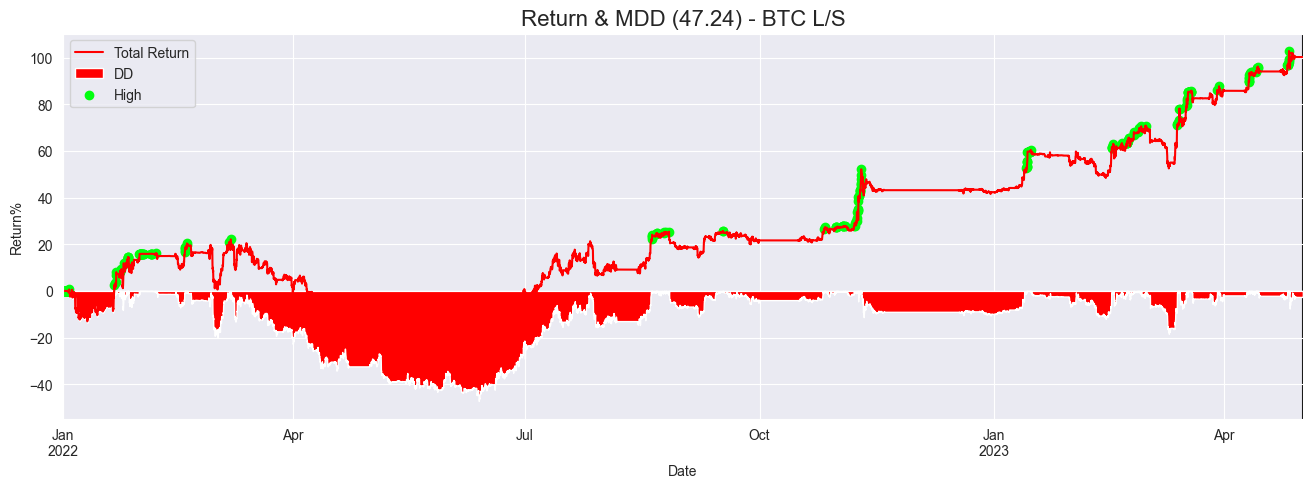

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |      5.7  | 4331.54 | -3867.37 |       1.12 |   50    |         16 |
| 2022-06    |    -10.08 | 5454.61 | -6042.19 |       0.9  |   40    |         15 |
| 2022-09    |     28.32 | 4566.57 | -2276.73 |       2.01 |   56.25 |         16 |
| 2022-12    |     23.97 | 2864.57 |  -799.16 |       3.58 |   55.56 |          9 |
| 2023-03    |     56.66 | 7699.23 | -3346.75 |       2.3  |   50    |         16 |
| 2023-06    |     14.47 | 1447.07 |     0    |     inf    |  100    |          2 |
+------------+-----------+---------+----------+------------+---------+------------+


In [15]:
all_params = multi_test.multi_params(['BTC'],sample_sets,direction='L/S')
trades, value_df = multi_test.multi_params_result(all_params)
# multi_test.save_version_result(all_params,value_df,trades,1)

In [21]:
record = pd.read_csv('1h/BTC/long_record_df.csv').drop(columns='Unnamed: 0')

In [22]:
record.head(10)

,params,value,Start,End,Period,Start Value,Min Value,Max Value,End Value,Total Return [%],Benchmark Return [%],Total Time Exposure [%],Max Gross Exposure [%],Max Drawdown [%],Max Drawdown Duration,Total Orders,Total Fees Paid,Total Trades,Win Rate [%],Best Trade [%],Worst Trade [%],Avg Winning Trade [%],Avg Losing Trade [%],Avg Winning Trade Duration,Avg Losing Trade Duration,Profit Factor,Expectancy,Sharpe Ratio,Calmar Ratio,Omega Ratio,Sortino Ratio,side
0,"{'vol_threshold': 5, 'ret_threshold': 1}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,4991.043407,13637.346634,13378.753917,33.787539,-39.97492,53.909465,100.0,58.010733,403 days 23:00:00,92,230.005737,46,50.000000,34.997591,-27.896256,7.667398,-5.418648,5 days 16:41:44.347826086,5 days 16:41:44.347826086,1.316350,73.451172,0.696451,0.421211,1.033125,0.992588,long
1,"{'vol_threshold': 10, 'ret_threshold': 1}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,4991.043407,13637.346634,13378.753917,33.787539,-39.97492,53.909465,100.0,58.010733,403 days 23:00:00,92,230.005737,46,50.000000,34.997591,-27.896256,7.667398,-5.418648,5 days 16:41:44.347826086,5 days 16:41:44.347826086,1.316350,73.451172,0.696451,0.421211,1.033125,0.992588,long
2,"{'vol_threshold': 5, 'ret_threshold': 2}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,4991.043407,12258.903212,12000.310495,20.003105,-39.97492,50.617284,100.0,58.010733,439 days 17:00:00,86,207.105525,43,46.511628,34.997591,-27.896256,8.174826,-5.418648,5 days 18:00:00,5 days 16:41:44.347826086,1.193362,46.518849,0.526750,0.253003,1.025849,0.748300,long
3,"{'vol_threshold': 10, 'ret_threshold': 2}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,4991.043407,12258.903212,12000.310495,20.003105,-39.97492,50.617284,100.0,58.010733,439 days 17:00:00,86,207.105525,43,46.511628,34.997591,-27.896256,8.174826,-5.418648,5 days 18:00:00,5 days 16:41:44.347826086,1.193362,46.518849,0.526750,0.253003,1.025849,0.748300,long
4,"{'vol_threshold': 10, 'ret_threshold': 4}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,4991.043407,11886.474205,11496.581707,14.965817,-39.97492,48.559671,100.0,58.010733,445 days 07:00:00,82,195.421962,41,46.341463,34.997591,-27.896256,8.253050,-5.595178,5 days 18:56:50.526315789,5 days 17:27:16.363636363,1.148132,36.501993,0.457860,0.190351,1.022799,0.649434,long
5,"{'vol_threshold': 10, 'ret_threshold': 3}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,4991.043407,11886.474205,11496.581707,14.965817,-39.97492,48.559671,100.0,58.010733,445 days 07:00:00,82,195.421962,41,46.341463,34.997591,-27.896256,8.253050,-5.595178,5 days 18:56:50.526315789,5 days 17:27:16.363636363,1.148132,36.501993,0.457860,0.190351,1.022799,0.649434,long
6,"{'vol_threshold': 5, 'ret_threshold': 3}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,4991.043407,11886.474205,11496.581707,14.965817,-39.97492,48.559671,100.0,58.010733,445 days 07:00:00,82,195.421962,41,46.341463,34.997591,-27.896256,8.253050,-5.595178,5 days 18:56:50.526315789,5 days 17:27:16.363636363,1.148132,36.501993,0.457860,0.190351,1.022799,0.649434,long
7,"{'vol_threshold': 5, 'ret_threshold': 4}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,4991.043407,11886.474205,11496.581707,14.965817,-39.97492,48.559671,100.0,58.010733,445 days 07:00:00,82,195.421962,41,46.341463,34.997591,-27.896256,8.253050,-5.595178,5 days 18:56:50.526315789,5 days 17:27:16.363636363,1.148132,36.501993,0.457860,0.190351,1.022799,0.649434,long
8,"{'vol_threshold': 15, 'ret_threshold': 1}",open_time\n2022-01-01 00:00:00 10000.000000...,2022-01-01,2023-05-01 23:00:00,486 days,10000.0,4991.043407,11886.474205,11439.510548,14.39510